## CMIP6 model data using Pangeo catalog

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

In [2]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [8]:
cat = col.search(source_id=['UKESM1-0-LL'], 
                 experiment_id=['historical'], table_id=['SImon'], 
                 variable_id=['siconc']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MOHC,UKESM1-0-LL,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200309
1,CMIP,MOHC,UKESM1-0-LL,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200309
2,CMIP,MOHC,UKESM1-0-LL,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200309
3,CMIP,MOHC,UKESM1-0-LL,historical,r7i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200310
4,CMIP,MOHC,UKESM1-0-LL,historical,r8i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200310
5,CMIP,MOHC,UKESM1-0-LL,historical,r5i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200310
6,CMIP,MOHC,UKESM1-0-LL,historical,r9i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200310
7,CMIP,MOHC,UKESM1-0-LL,historical,r6i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200310
8,CMIP,MOHC,UKESM1-0-LL,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200319
9,CMIP,MOHC,UKESM1-0-LL,historical,r10i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/histori...,NaN,20200428


In [9]:
# Create dictionary from the list of datasets we found
dsi_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [10]:
si = dsi_dict[list(dsi_dict.keys())[0]]

## Creat ensemble mean and select GL area

In [11]:
# average over the ensemble means
si_mean = si['siconc'].mean(dim = ['member_id'], keep_attrs=True)

In [13]:
si_mean

<xarray.DataArray 'siconc' (time: 1980, j: 330, i: 360)>
dask.array<mean_agg-aggregate, shape=(1980, 330, 360), dtype=float32, chunksize=(677, 330, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    type       |S7 ...
Attributes:
    cell_measures:   area: areacello
    cell_methods:    area: mean where sea time: mean
    comment:         Area fraction of grid cell covered by sea ice
    history:         2020-06-05T07:44:29Z altered by CMOR: Converted units fr...
    long_name:       Sea-ice Area Percentage (Ocean Grid)
    original_name:   mo: (variable_name: aice)
    original_units:  1
    standard_name:   sea_ice_area_fraction
    units:           %

In [14]:
# Select greenland area
si_GL = si_mean.where((si_mean.longitude>=-10) & (si_mean.longitude<=10) & (si_mean.latitude <=85 )  & (si_mean.latitude >= 70),drop = True)

## Get areacello variable from UKESM

In [17]:
cat = col.search(source_id=['UKESM1-0-LL'], 
                 experiment_id=['piControl'], table_id=['Ofx'], 
                 variable_id=['areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MOHC,UKESM1-0-LL,piControl,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/piContr...,NaN,20190705


In [19]:
# Create dictionary from the list of datasets we found
darea_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [20]:
area = darea_dict[list(darea_dict.keys())[0]]

In [23]:
area = area.squeeze()
area

<xarray.Dataset>
Dimensions:             (j: 330, i: 360, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 323 324 325 326 327 328 329
    latitude            (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    member_id           <U8 'r1i1p1f2'
Dimensions without coordinates: vertices
Data variables:
    areacello           (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
Attributes: (12/50)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    39600.0
    branch_time_in_parent:   39600.0
    cmor_version:            3.4.0
    ...                      ...
    variant_label:           r1i1p1f2
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/048bb3c9-4cba-4860-823b-d6aafc7b1f2e
    version_id:              v20190705
    intake_esm_varname:      ['areacello']
    intake_esm_dataset_key:  CMIP.MOHC.UKESM1-0-LL.piControl.Ofx.gn

## Select GL area for areacello variable

In [24]:
GLarea = area.areacello.where((area.latitude >=70) & (area.latitude <=85) & (area.longitude <= 10) & (area.longitude >= -10), drop = True)

## Compute the area weighted average SIC from UKESM

In [25]:
# Area weighted average
si_weighted = (GLarea*si_GL).sum(dim=('i','j'))/GLarea.sum(dim=('i','j'))

In [26]:
si_weighted

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(677,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    type       |S7 b'sea_ice'

## Groupby month and plot

In [27]:
si_monthly = si_weighted.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

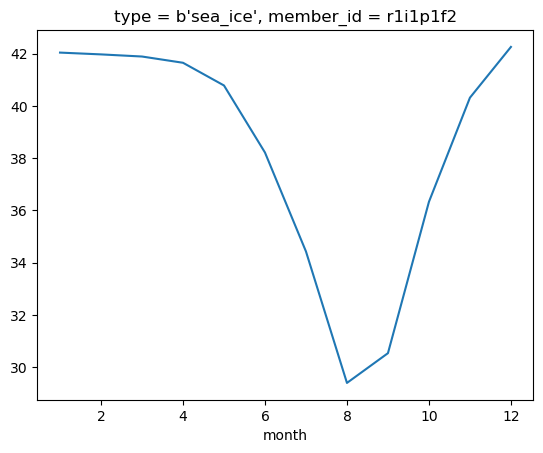

In [28]:
si_monthly.plot()